# Analysis of Search Trends by Plan Level

## Data Loading and Initial Exploration

In [17]:
import pandas as pd

# Load the CSV file into a dataframe
df1 = pd.read_csv('athlete_search_test _sheet1.csv')

# Display the first few rows of the dataframe
df1.head()



,search_id,date,brand_userID,brand_profileID,planLevel,minPrice,maxPrice,view_id,user,path,entity,view_created,athlete_userID,athlete_profileID,athlete_name_y
0,6324bdc92868650d6a287230,2022-09-16 18:17:45,6324bc99ae320d0d70685b40,6324bc9aefe46f0d71d8e376,3,100.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63249faddc535e0d52662a36,2022-09-16 16:09:17,63249f32dc535e0d526621fb,63249f32dc535e0d52662213,3,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,632426c9a6dd320d8fa0c863,2022-09-16 7:33:30,6265b7fc658e4b0d9db1ad1a,6265b7fd7e6fce7d64a970d9,3,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,632426c8a6dd320d8fa0c848,2022-09-16 7:33:28,6265b7fc658e4b0d9db1ad1a,6265b7fd7e6fce7d64a970d9,3,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,632426c5a6dd320d8fa0c801,2022-09-16 7:33:26,6265b7fc658e4b0d9db1ad1a,6265b7fd7e6fce7d64a970d9,3,100.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

In [18]:
# Convert the 'date' column to datetime and extract the date
df1['date'] = pd.to_datetime(df1['date']).dt.date

# Filter the data for plan level 0 and 3 (excluding plan level 9 as it's not in the dataset)
filtered_data = df1[df1['planLevel'].isin([0, 3])]

# Group the data by 'planLevel' and 'date', and count the number of searches
search_trends = filtered_data.groupby(['planLevel', 'date']).size().reset_index(name='search_count')

# Check the first few rows of the resulting DataFrame
search_trends.head()

,planLevel,date,search_count
0,0,2022-01-01,5
1,0,2022-01-02,12
2,0,2022-01-03,14
3,0,2022-01-04,30
4,0,2022-01-05,55


In [19]:
# Filter the data to include only dates from July 16 to September 16
filtered_search_trends = search_trends[(search_trends['date'] >= pd.to_datetime('2022-07-16')) & 
                                       (search_trends['date'] <= pd.to_datetime('2022-09-16'))]

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


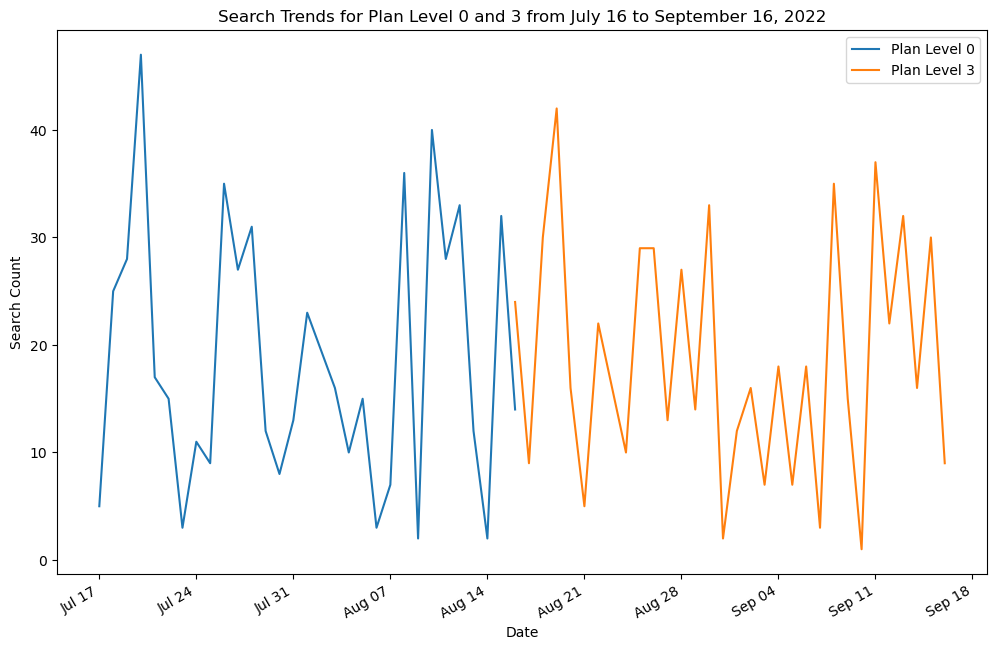

In [20]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Draw a line plot for each plan level
for planLevel in [0, 3]:  # Only consider Plan Levels 0 and 3
    data = filtered_search_trends[filtered_search_trends['planLevel'] == planLevel]
    ax.plot(data['date'], data['search_count'], label=f'Plan Level {planLevel}')

# Set the title and labels of the plot
ax.set_title('Search Trends for Plan Level 0 and 3 from July 16 to September 16, 2022')
ax.set_xlabel('Date')
ax.set_ylabel('Search Count')

# Format the x-axis to display dates more clearly
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Set major ticks every week
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format the date as month-day

# Add a legend
ax.legend()

# Rotate and align the x labels
fig.autofmt_xdate()

# Show the plot
plt.show()



# Summary of Search Trends for Plan Level 0 and 3

The line plot illustrates search trends for Plan Level 0 and Plan Level 3 over two months, from July 16 to September 16, 2022. 

Key observations include:

1. **Plan Level 0**: This plan level shows wider, less pointy peaks in search activity, suggesting a sustained interest or activity over several days. It indicates a pattern of steady usage with periods of increased activity.

2. **Plan Level 3**: In contrast, Plan Level 3 presents sharp, pointy peaks, indicating that spikes in search activity are short-lived and possibly event-driven. This pattern may suggest that users on Plan Level 3 are reacting quickly to specific events, leading to brief spikes in search activity.

These patterns hint at different user behaviors across the plan levels, potentially influenced by user characteristics or the features of each plan level. While these interpretations are based on the data available for this specific period, they would benefit from further investigation, possibly involving additional data or contextual information.



# Day-over-Day Growth in Search Counts

In addition to the absolute search counts, it can be informative to examine the rate of change in search activity from day to day. This can provide insights into the dynamics of user behavior and the responsiveness of users to changes or events.

For this purpose, we calculate the day-over-day (DoD) growth rates in search counts for each plan level. The DoD growth rate is the percentage change in `search_count` from the previous day to the current day.

Let's add a new column to our DataFrame to hold these growth rates.

In [21]:
# Calculate the day-over-day growth rates in search counts
filtered_search_trends['DoD_growth'] = filtered_search_trends.groupby('planLevel')['search_count'].pct_change()

# Check the result
filtered_search_trends.head()


/var/folders/t3/8hhv74pn4nd149_0pfq0q6gr0000gn/T/ipykernel_26532/4131364994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_search_trends['DoD_growth'] = filtered_search_trends.groupby('planLevel')['search_count'].pct_change()


,planLevel,date,search_count,DoD_growth
196,0,2022-07-17,5,NaN
197,0,2022-07-18,25,4.000000
198,0,2022-07-19,28,0.120000
199,0,2022-07-20,47,0.678571
200,0,2022-07-21,17,-0.638298


# Visualization of Day-over-Day Growth Rates in Search Counts

Now that we have calculated the day-over-day growth rates, we can visualize these rates for Plan Level 0 and Plan Level 3 over the period from July 16 to September 16, 2022.

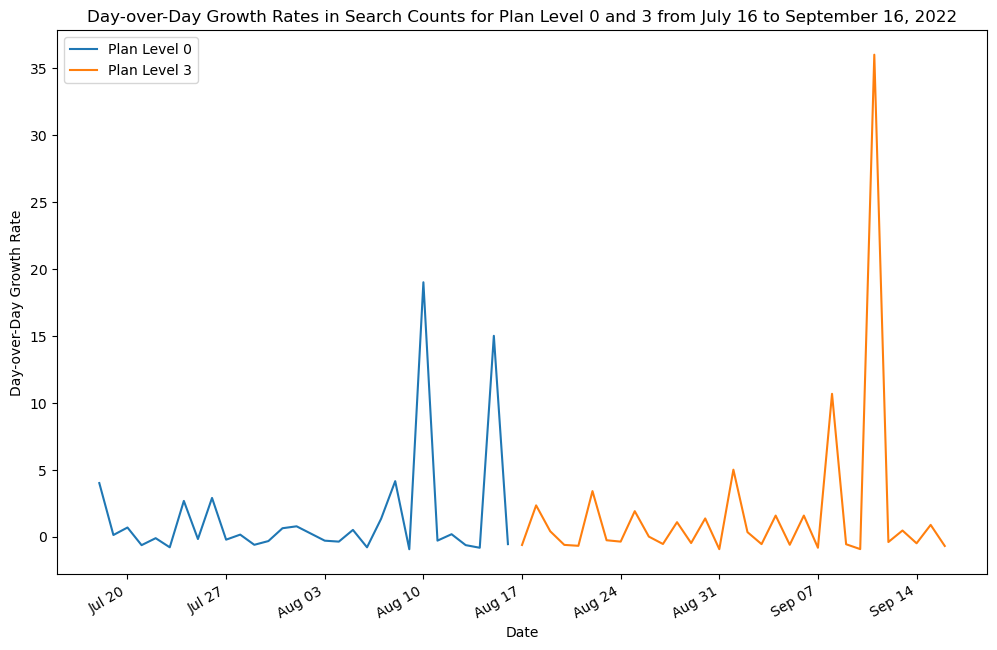

In [22]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Draw a line plot for each plan level
for planLevel in [0, 3]:  # Only consider Plan Levels 0 and 3
    data = filtered_search_trends[filtered_search_trends['planLevel'] == planLevel]
    ax.plot(data['date'], data['DoD_growth'], label=f'Plan Level {planLevel}')

# Set the title and labels of the plot
ax.set_title('Day-over-Day Growth Rates in Search Counts for Plan Level 0 and 3 from July 16 to September 16, 2022')
ax.set_xlabel('Date')
ax.set_ylabel('Day-over-Day Growth Rate')

# Format the x-axis to display dates more clearly
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Set major ticks every week
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format the date as month-day

# Add a legend
ax.legend()

# Rotate and align the x labels
fig.autofmt_xdate()

# Show the plot
plt.show()


# Analysis of Day-over-Day Growth Rates in Search Counts

Based on the day-over-day growth rates in search counts for Plan Levels 0 and 3 from July 16 to September 16, 2022, we observe distinct differences in the search activity patterns:

- **Activity Period**: Plan Level 0 was active from mid-July to mid-August, while Plan Level 3 was active from mid-August to mid-September, indicating a transition from Plan Level 0 to Plan Level 3 around mid-August.

- **Consistency of Search Activity**: Plan Level 0 showed a more consistent level of daily search activity with fewer fluctuations in the day-over-day growth rates, suggesting sustained interest or more regular usage patterns. In contrast, Plan Level 3 displayed more variability with frequent and larger fluctuations, suggesting that search behavior may be influenced by dynamic factors or specific events.

- **Magnitude of Spikes**: Both plan levels experienced spikes in search activity, but Plan Level 3 had a particularly significant spike around September 13, indicating a substantial increase in search activity on that day. The cause of this spike would be an interesting area for further exploration.

- **Comparative Rates of Growth**: Plan Level 3 often shows higher rates of day-over-day growth compared to Plan Level 0. This suggests that search activity for Plan Level 3 can change more drastically from one day to the next. However, these increases are often followed by decreases, resulting in many small up and down spikes. This pattern suggests that the factors driving these increases in search activity may be temporary or rapidly changing.

Unfortunately, we don't have data for Plan Level 9, so we can't compare it with Plan Levels 0 and 3.

These observations provide valuable insights into the search behavior of users at different plan levels. The transition from Plan Level 0 to Plan Level 3 around mid-August, characterized by an increase in the variability of daily search activity and larger spikes in search activity, suggests potential changes in user behavior or needs.